<span style="font-size: 18px;"><b> Создание механизма прогнозирования успешности компьютерных игр (по открытым данным). </span></b>

## Описание проекта.
Проект по данным из открытых источников для интернет-магазина "Стримчик", продающего компьютерные игры по всему миру.

**Цель проекта:** Научиться выбирать потенциально успешный продукт. Для этого выявить закономерности, определяющие успешность игры.

**Описание данных:**

`Name` — название игры  
`Platform` — платформа  
`Year_of_Release` — год выпуска  
`Genre` — жанр игры  
`NA_sales` — продажи в Северной Америке (миллионы проданных копий)  
`EU_sales` — продажи в Европе (миллионы проданных копий)  
`JP_sales` — продажи в Японии (миллионы проданных копий)  
`Other_sales` — продажи в других странах (миллионы проданных копий)  
`Critic_Score` — оценка критиков (максимум 100)  
`User_Score` — оценка пользователей (максимум 10)  
`Rating` — рейтинг от ESRB (Entertainment Software Rating Board - ассоциация, определяющая возрастной рейтинг комьютерных игр)

Данные за 2016 год могут быть неполными.


**Проект предполагает:**
- изучение и предобработку данных,
- исследовательский анализ,
- подготовку данных к проверке гипотез,
- проверку гипотез статистическими методами.

## Загрузка данных.


### Импортируем библиотеки, настраиваем окружение.

In [1]:
import pandas as pd
import numpy as np

import scipy.stats as st
#import math

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#%pip install missingno
#import missingno as msno

import os

In [2]:
#формат вещественных чисел в таблицах
pd.set_option('display.float_format', '{:.2f}'.format)

#сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)

#разрешение графиков получше
%config InlineBackend.figure_format = 'retina'

### Загружаем данные.

In [3]:
url = 'https://raw.githubusercontent.com/polina508/files/main/games.csv'
data = pd.read_csv(url)
data.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
161,Forza Motorsport 3,X360,2009.00,Racing,2.99,1.90,0.10,0.50,92.00,8,E
6584,Combination Pro Soccer: J-League no Kantoku ni...,PS,1998.00,Sports,0.00,0.00,0.24,0.02,NaN,NaN,NaN
10556,Penguin no Mondai: The World,DS,2010.00,Adventure,0.00,0.00,0.10,0.00,NaN,NaN,NaN
11954,Dead Island: Riptide,PC,NaN,Action,0.00,0.07,0.00,0.01,61.00,6,M
10566,Backyard Baseball '10,Wii,2009.00,Sports,0.09,0.00,0.00,0.01,NaN,tbd,E


In [4]:
data.shape

(16715, 11)

In [5]:
data['Name'].nunique()

11559

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### **Описание данных:**  
- Данные содержат 16715 записей об 11559 уникальных играх с описанием параметров, цифрами продаж и оценок.  
- В столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating` есть пропуски.
- Часть типов столбцов не совсем удачные.

**Нужно сделать:**
- Переименовать столбцы в удобные названия.
- Проверить на наличие дубликатов и аномалий.
- По возможность заполнить или удалить пропуски.
- Привести типы данных к удобным.

## Предобработка данных.


### Переименовываем столбцы.

In [7]:
data.columns = data.columns.str.lower()

### Разбираемся с типами данных.
Почему у `user_score` тип object. Смотрим значения в столбце.

In [8]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Обнаруживаем tbd - плейсхолдер для ситуаций, когда скора ещё нет.

In [9]:
data.query('user_score == "tbd"')['user_score'].count()

2424

Имеем на 2424 больше nan значений в столбце user_score. Чтобы избежать путаницы, заменим на NaN, и поменяем тип столбца на подходящий.

In [10]:
data.loc[data['user_score'] == 'tbd','user_score'] = np.nan
data['user_score'] = data ['user_score'].astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Если удастся заполнить пустые значения в `year_of_release`, хорошо бы потом поменять там тип на int.

### Пропущенные значения.


####  Name
Посмотрим, откуда в таблице 5+ тысяч игр с одинаковыми названиями.

In [11]:
# на всякий случай приведём все к одному регистру
data['name'] = data['name'].str.lower()

# выберем все игры, названия которых встречаются в датафрейме больше 1 раза:
dup_names = data.groupby('name').filter(lambda x: len(x) > 1)['name'].unique()

# посмотрим на них вблизи
data.query('name in @dup_names').sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3862,frozen: olaf's quest,DS,2013.00,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN
3358,frozen: olaf's quest,3DS,2013.00,Platform,0.27,0.27,0.00,0.05,NaN,NaN,NaN
3120,007: quantum of solace,Wii,2008.00,Action,0.29,0.28,0.01,0.07,54.00,7.50,T
1785,007: quantum of solace,PS3,2008.00,Action,0.43,0.51,0.02,0.19,65.00,6.60,T
1285,007: quantum of solace,X360,2008.00,Action,0.82,0.51,0.01,0.14,65.00,7.10,T
...,...,...,...,...,...,...,...,...,...,...,...
3516,zumba fitness,PS3,2010.00,Sports,0.28,0.21,0.00,0.08,NaN,3.80,E
13172,zumba fitness core,X360,2012.00,Misc,0.00,0.05,0.00,0.00,77.00,6.70,E10+
12439,zumba fitness core,Wii,2012.00,Misc,0.00,0.06,0.00,0.01,NaN,NaN,E10+
7137,zumba fitness: world party,Wii,2013.00,Misc,0.11,0.10,0.00,0.02,NaN,NaN,E


Выходит, это не дубликаты, а нужная информация про игры на разных платформах.

#### Genre
Проверим, что игры, про которые нет жанра, это те же самые, про которые мы не знаем даже названия, и удалим.

In [12]:
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [13]:
data = data.query('~name.isna()')

####  Year_of_release
Посмотрим, что за пустоты в year_of_release и можно ли их как-то заполнить.  
Посмотрим сколько их точно.

In [14]:
data['year_of_release'].isna().sum()

269

Немного, удалим.

In [15]:
data.dropna(subset=['year_of_release'], inplace=True)

<ipython-input-15-9cdfa7a05b71>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['year_of_release'], inplace=True)


Сразу же и приведём к удобному типу. Здесь у нас годы, так что int16 будет достаточно.

In [16]:
data['year_of_release'] = data['year_of_release'].astype('int16')

<ipython-input-16-7126b683a03b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year_of_release'] = data['year_of_release'].astype('int16')


#### `critic_score`, `user_score`, `rating`
В этих столбцах пропуски пока оставим в покое, но потом, возможно, нужно будет посмотреть внимательнее и прикинуть, как заполнить.  
Столбец `rating` теоретически можно было бы заполнить информацией из соседних строк про такую же игру на других платформах, но не уверена, что на разных платформах критерии не могут различаться, поэтому на всякий случай не будем устраивать самодеятельность.

### Проверим на дубликаты.

In [17]:
data.duplicated().sum()

0

Явных дубликатов нет, убедимся, что все игры с одинаковыми названиями - это правда просто разные платформы и/или годы выпуска.

In [18]:
data[['name', 'platform', 'year_of_release']].duplicated().sum()

1

In [19]:
data[data[['name', 'platform', 'year_of_release']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,madden nfl 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.00,5.50,E


In [20]:
data.query('name == "madden nfl 13" and platform == "PS3"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.00,5.50,E
16230,madden nfl 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.00,5.50,E


Похоже на крохотный технический сбой.   
Нет уверенности, что это действительно отдельные, а не дублированные 10 тыс проданных копий, так что просто дропнем этот дубликат.

In [21]:
data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], inplace=True)

<ipython-input-21-d5f7bf180f34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], inplace=True)


### Создадим новый столбец с суммарными продажами.

In [22]:
data['total_sales'] = data.loc[:, data.columns.str.endswith('_sales')].sum(axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int16  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int16(1), object(4)
memory usage: 1.5+ MB


In [23]:
data[['name', 'platform']].nunique()

name        11426
platform       31
dtype: int64

### Итоги предобработки.

- поправлены названия столбцов,  
- изменены типы данных столбцов:
    - `user_score` на float (и 'tbd' значения заменены на nan),
    - `year_of_release` на int16,
- удалены 2 строки с неизвестными играми неизвестного жанра,
- удалены 269 строк с пустыми значениями в столбце `year_of_release`,
- оставлены пустоты в столбцах `critic_score`, `user_score`, `rating`,
- найден и удалён 1 дубликат (похож на несущественный технический сбой),
- создан новый столбец с суммарными продажами для каждой игры на определённой платформе.

**Для дальнейшего анализа имеем** 16443 записей с информацией о 11426 играх с 31 платформы.

**Нужно будет:** определиться с периодом, данные за который считать актуальными.

## Исследовательский анализ данных.


Посмотрим, как менялось количество выпускаемых во времени по отдельным платформам.

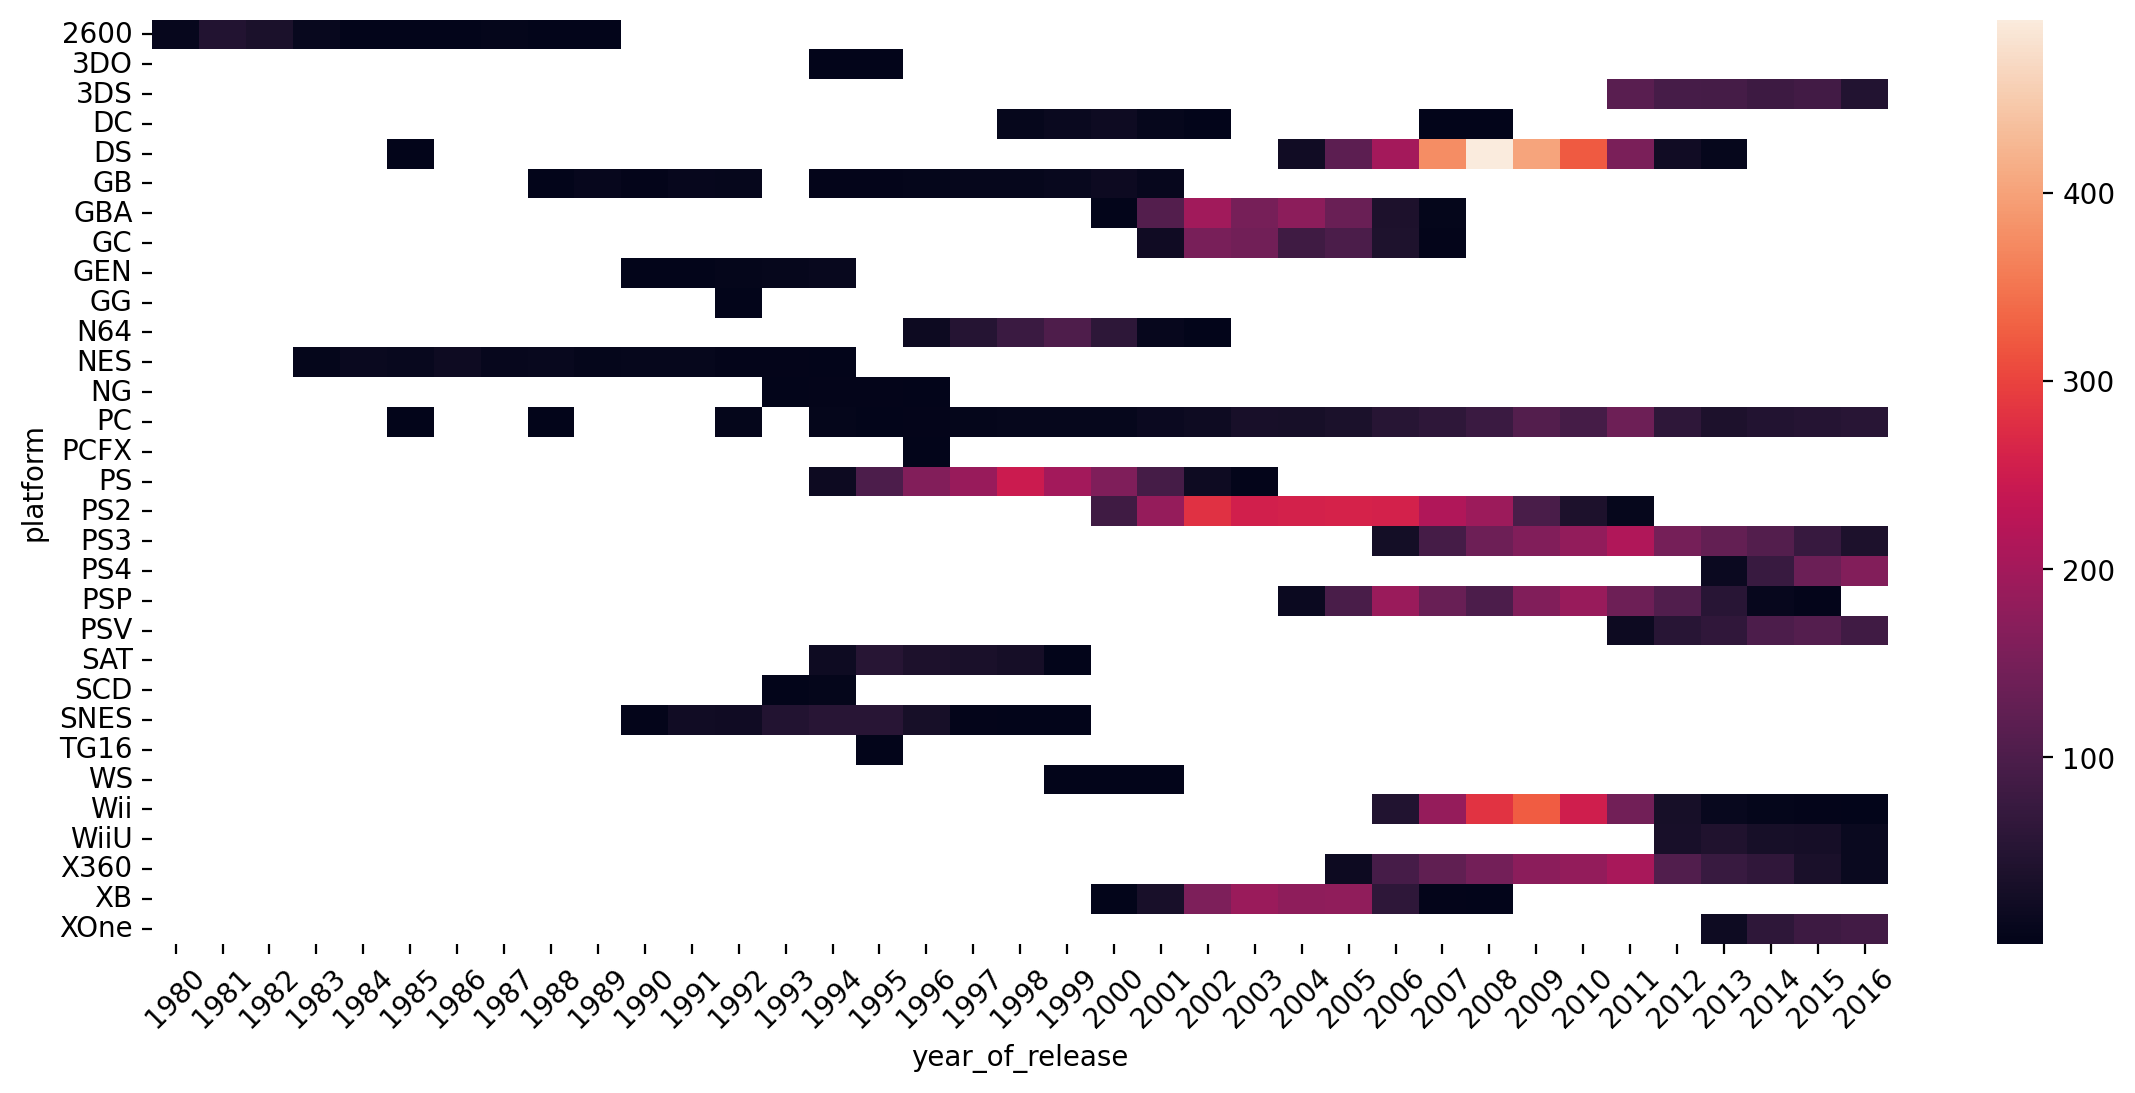

In [25]:
def platmap(data):
    plt.figure(figsize=(14,6))
    sns.heatmap(data.pivot_table(index='platform'
                 , columns='year_of_release'
                 , values='name'
                 , aggfunc='count'))
    plt.xticks(rotation=45);

platmap(data)

Чтобы понять, данные за какой период можно считать актуальными, и основывать прогноз на них, начнём с того, что посмотрим на восход и закат платформ в цифрах.

In [27]:
#считаем длительность активности каждой платформы, смотрим для неё основные статистики
(
    data.pivot_table(index='platform'
                     , values='year_of_release'
                     , aggfunc=(lambda x: x.max()-x.min()))
).rename(columns={'year_of_release': 'life_cycle'}).describe().T

,count,mean,std,min,25%,50%,75%,max
life_cycle,31.00,7.61,7.00,0.00,3.00,6.00,10.00,31.00


Обнаруживаем, что они живут примерно от 3 до 10 лет с медианой-средним в 6-8 лет.  
Чтобы сфокусироваться на максимально современных и актуальных данных, сохраним данные за последние 7 лет, плюс дополнительно почистим от платформ, которые ушли в забвение больше пары лет назад.

In [28]:
#убираем все данные старше 7 лет
data = data.query('year_of_release > 2009')

#выбираем платформы, которые не подавали голоса после 2014 года
end_of_life = data.groupby('platform')['year_of_release'].max()
declined_platforms = end_of_life[end_of_life < 2015].index.tolist()

#убираем такие из нашего датасета
data = data.query('platform not in @declined_platforms')

Посмотрим, как шли дела с продажами у каждой платформы на оставленном промежутке времени.

In [29]:
sales_by_platform = data.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

#создаём график
fig = px.area(sales_by_platform
              , x='year_of_release'
              , y='total_sales'
              , color='platform'
              , title="Суммарные продажи каждой платформы по времени")
fig.update_xaxes(title_text='Год выпуска')
fig.update_yaxes(title_text='Продажи')
fig.show()

Ну так себе шли дела.  
Поскольку данные за 2016 год могут быть не полными, на динамику смотрим по 2015. Увеличили продажи новых игр только PS4 и XOne, возможно ещё WiiU держатся относительно ровненько, но они, конечно, сильно некрупные по сравнению с лидерами. У 3DS продажи новых игр идут на спад, но медленно, вот на них тоже посмотрим.  
На графике видно, что бывшие лидеры схлопывались не просто так, а в пользу следующего поколения, так что это скорее нормальный процесс. Это тоже нужно будет учитывать впоследствии принимая решение о том, на какой платформе остановиться.

Поскольку суммарные продажи зависят в том числе и от количества выпущенных игр, нас здесь будет ещё интересовать средние продажи на игру для каждой платформы, как оценка успешности платформы с нашей точки зрения, как перепродавцов.

In [30]:
sales_by_platform = data.groupby(['platform', 'year_of_release'])['total_sales'].mean().reset_index()

#создаём график
fig = px.area(sales_by_platform
              , x='year_of_release'
              , y='total_sales'
              , color='platform'
              , title="Средние продажи на игру каждой платформы по времени")
fig.show()

Здесь совсем другая картинка, и предыдущее поколение держится довольно достойно. Но мы уже знаем закон: платформы вечно не живут, плюс если завелось новое поколение, то старому скоро на пенсию.  
Итого, нам сейчас потенциально интересны: PS4, XOne, WiiU, 3DS - в таком порядке.

Платформы живут в среднем 7 лет. Cудя по хитму с распределением активности платформ (выраженном в количестве выпущенных игр), наибольший расцвет у них случается как раз в середине этого срока, интересные нам платформы вошли в силу примерно в 2013-2014 годах. Плюс 2013 год явно очень сильно выделяется из остальных нехарактерным выдающимся скачком продаж. Так что его лучше исключить из анализа.  
Итого: окончательно определяем актуальный для анализа и построения прогноза период в 3 года, и режем данные.  
Отрежется много, но это уйдут те данные, которые нам не очень интересны, потому что в индустрии всё меняется быстро, и строить прогноз на неактуальных данных бессмысленно.

In [31]:
data = data.query('year_of_release > 2013')

### Определение финансово-успешных платформ.
Посмотрим на продажи по платформам.

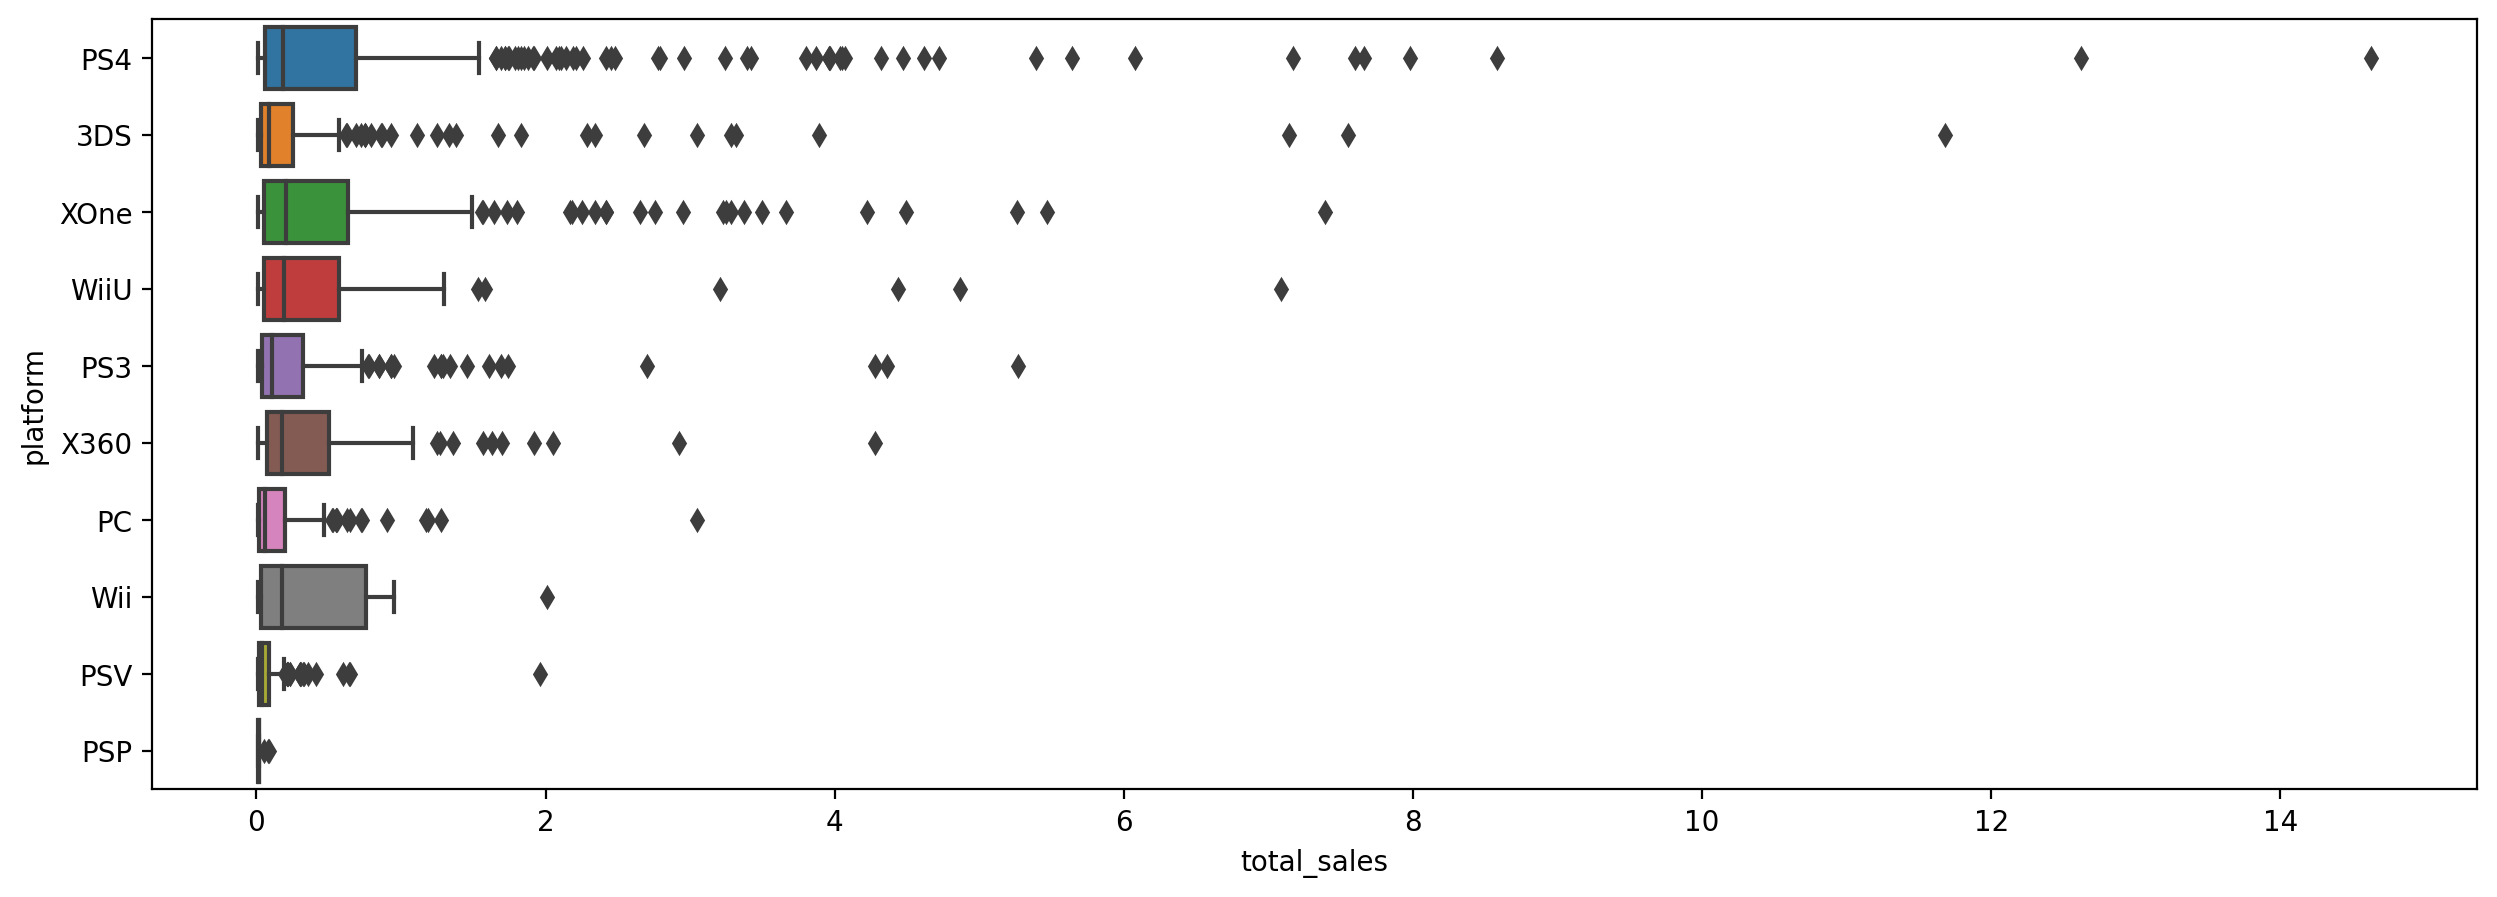

In [32]:
plt.figure(figsize=(15, 5))
sns.boxplot(y='platform'
            , x='total_sales'
            , data=data);

И поближе.

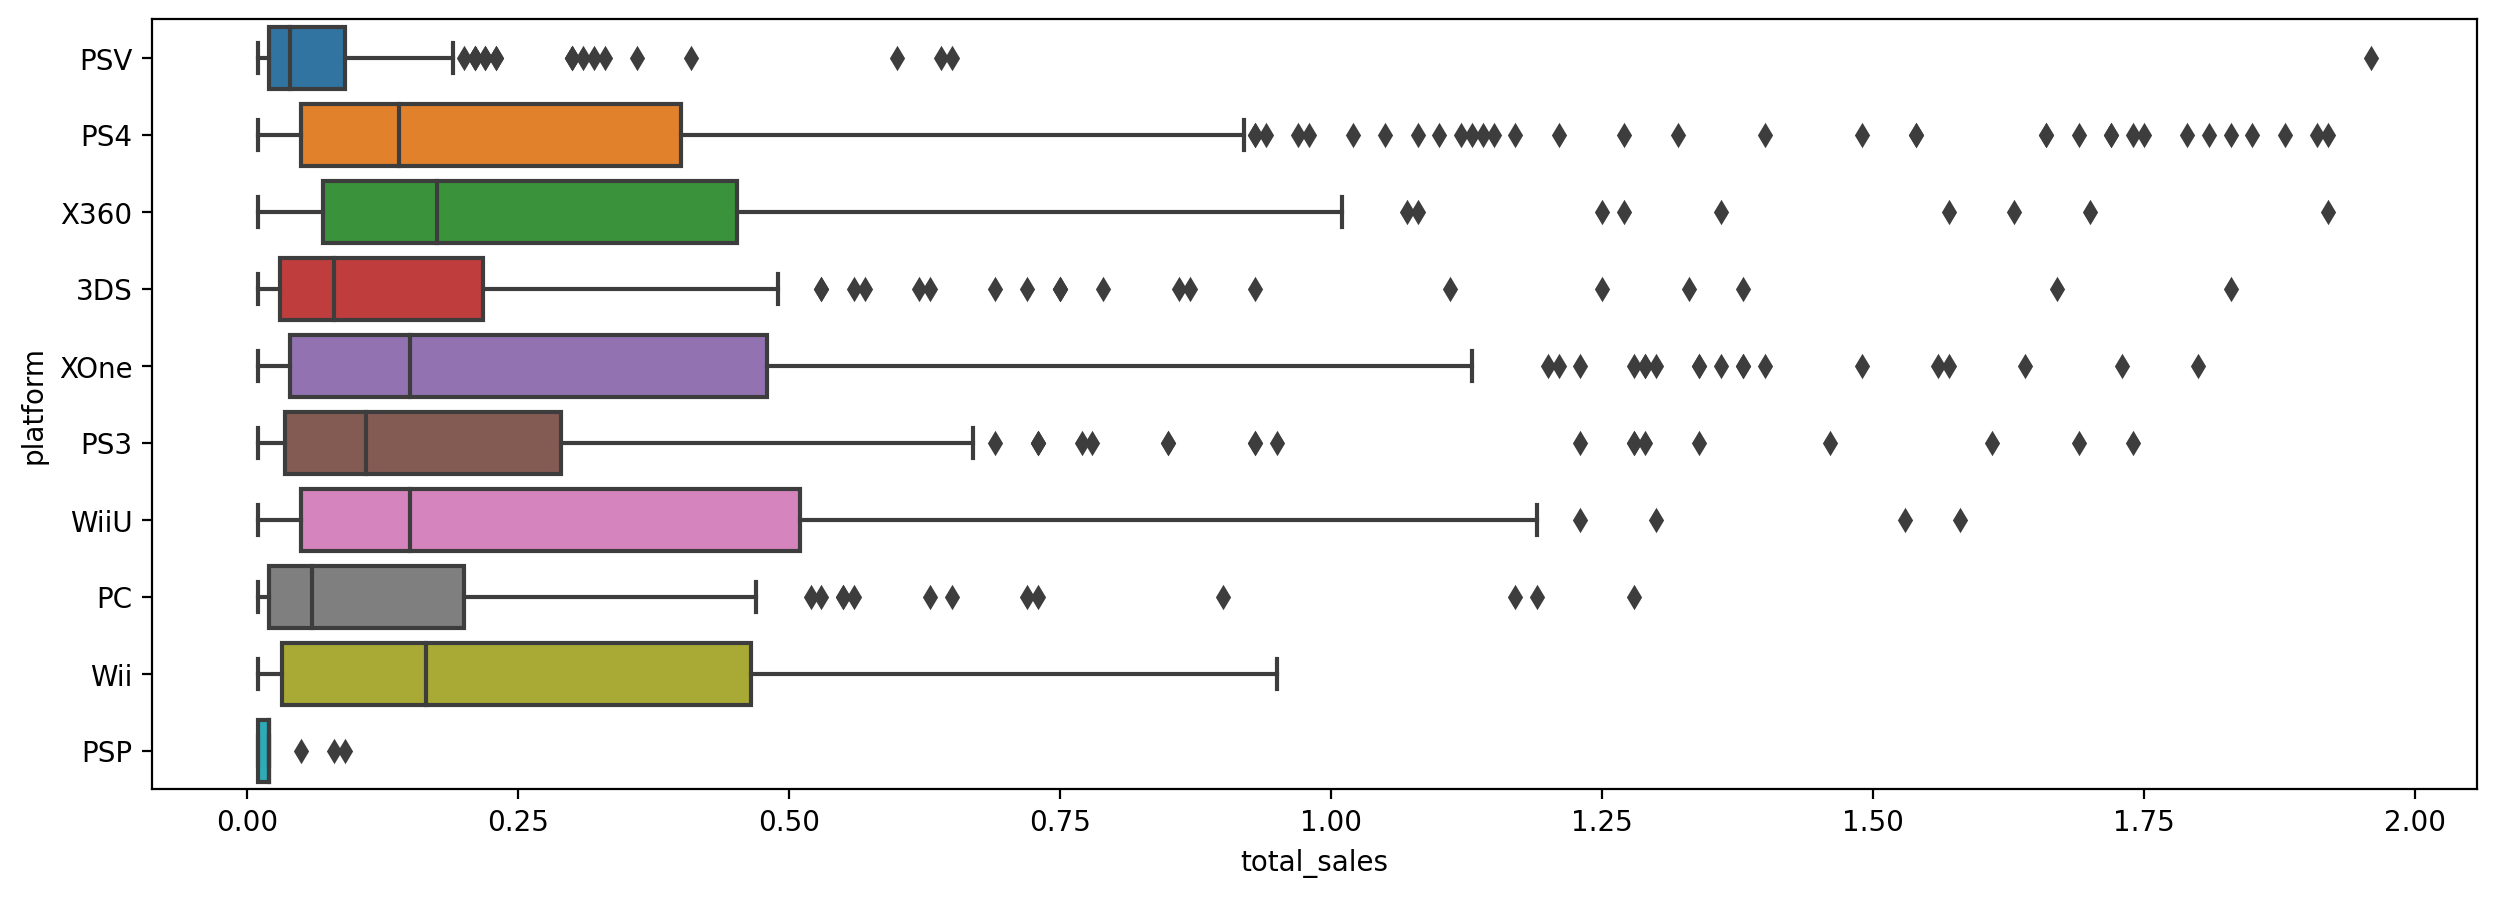

In [33]:
plt.figure(figsize=(15, 5))
sns.boxplot(y='platform'
            , x='total_sales'
            , data=data.query('total_sales < 2'));

Глянем ещё в цифрах, что там у них у всех со средними продажами на игру.

In [34]:
total_sales = data.groupby('platform')[['total_sales', 'name']] \
                  .agg({'total_sales': 'sum', 'name': 'count'})
total_sales['per_game'] = total_sales['total_sales'] / total_sales['name']
total_sales.sort_values(by='per_game', ascending=False)

,total_sales,name,per_game
platform,,,
PS4,288.15,376,0.77
XOne,140.36,228,0.62
WiiU,42.98,73,0.59
Wii,5.07,11,0.46
X360,48.22,111,0.43
3DS,86.68,212,0.41
PS3,68.18,219,0.31
PC,27.05,151,0.18
PSV,22.40,295,0.08


Итого: в качестве однозначных фаворитов определяемся c PS4, XOne, WiiU, но признаём, что Wii и X360 всё ещё неплохо держатся. Обнаруживаем феномен 3DS, которая идёт бедненько, но ровненько и, возможно, ещё всех переживёт.

### Влияние отзывов на продажи.
Посмотрим, как влияют на продажи отзывы пользователей и критиков для начала на примере PS4.

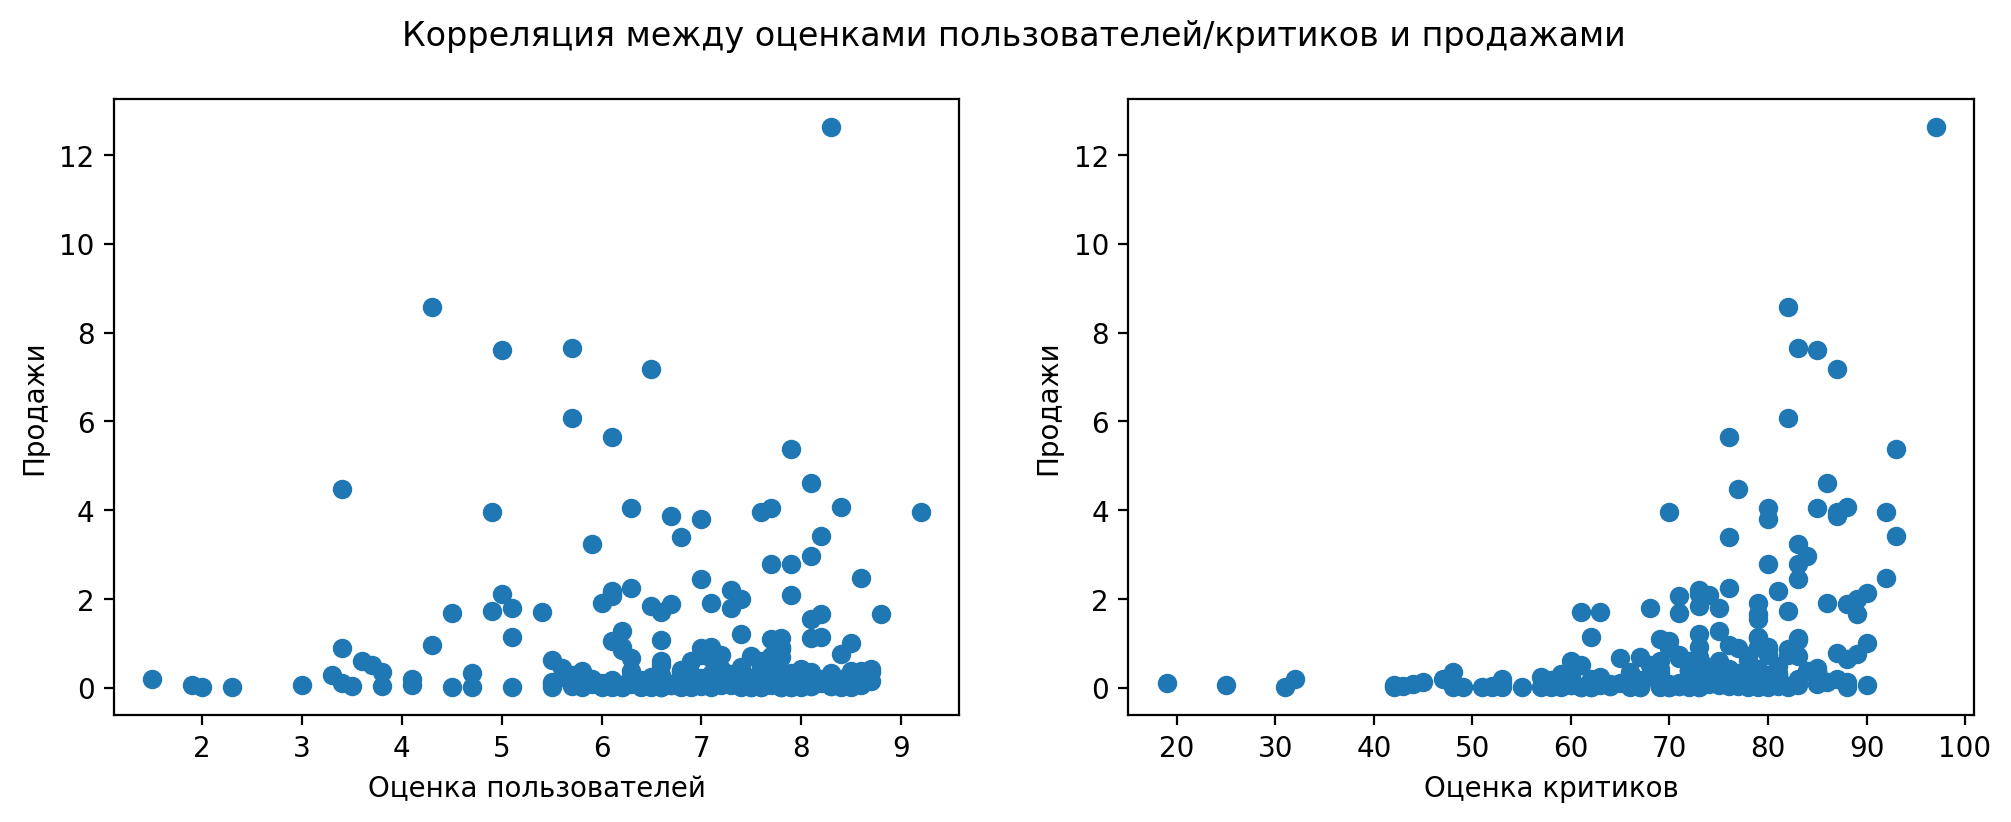

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].scatter(data.query('platform == "PS4"')['user_score']
            , data.query('platform == "PS4"')['total_sales'])
axs[0].set_xlabel('Оценка пользователей')
axs[0].set_ylabel('Продажи')

axs[1].scatter(data.query('platform == "PS4"')['critic_score']
            , data.query('platform == "PS4"')['total_sales'])
axs[1].set_xlabel('Оценка критиков')
axs[1].set_ylabel('Продажи')
fig.suptitle('Корреляция между оценками пользователей/критиков и продажами');

При некотором желании, можно рассмотреть корреляцию с critic_score.  
Использовать это можно так:
- на `user_score` вообще не смотреть,
- если у игры `critic_score` меньше 60, то там без шансов.

In [36]:
data.query('platform == "PS4"')['user_score'].corr(data.query('platform == "PS4"')['total_sales'])

-0.040131589472697356

In [37]:
data.query('platform == "PS4"')['critic_score'].corr(data.query('platform == "PS4"')['total_sales'])

0.40266141068104083

Ну вот что и требовалось доказать, ничего похожего на корреляцию у user_score, сомнительный намёк на корреляцию у critic_score.  
Посмотрим на некоторые другие платформы.

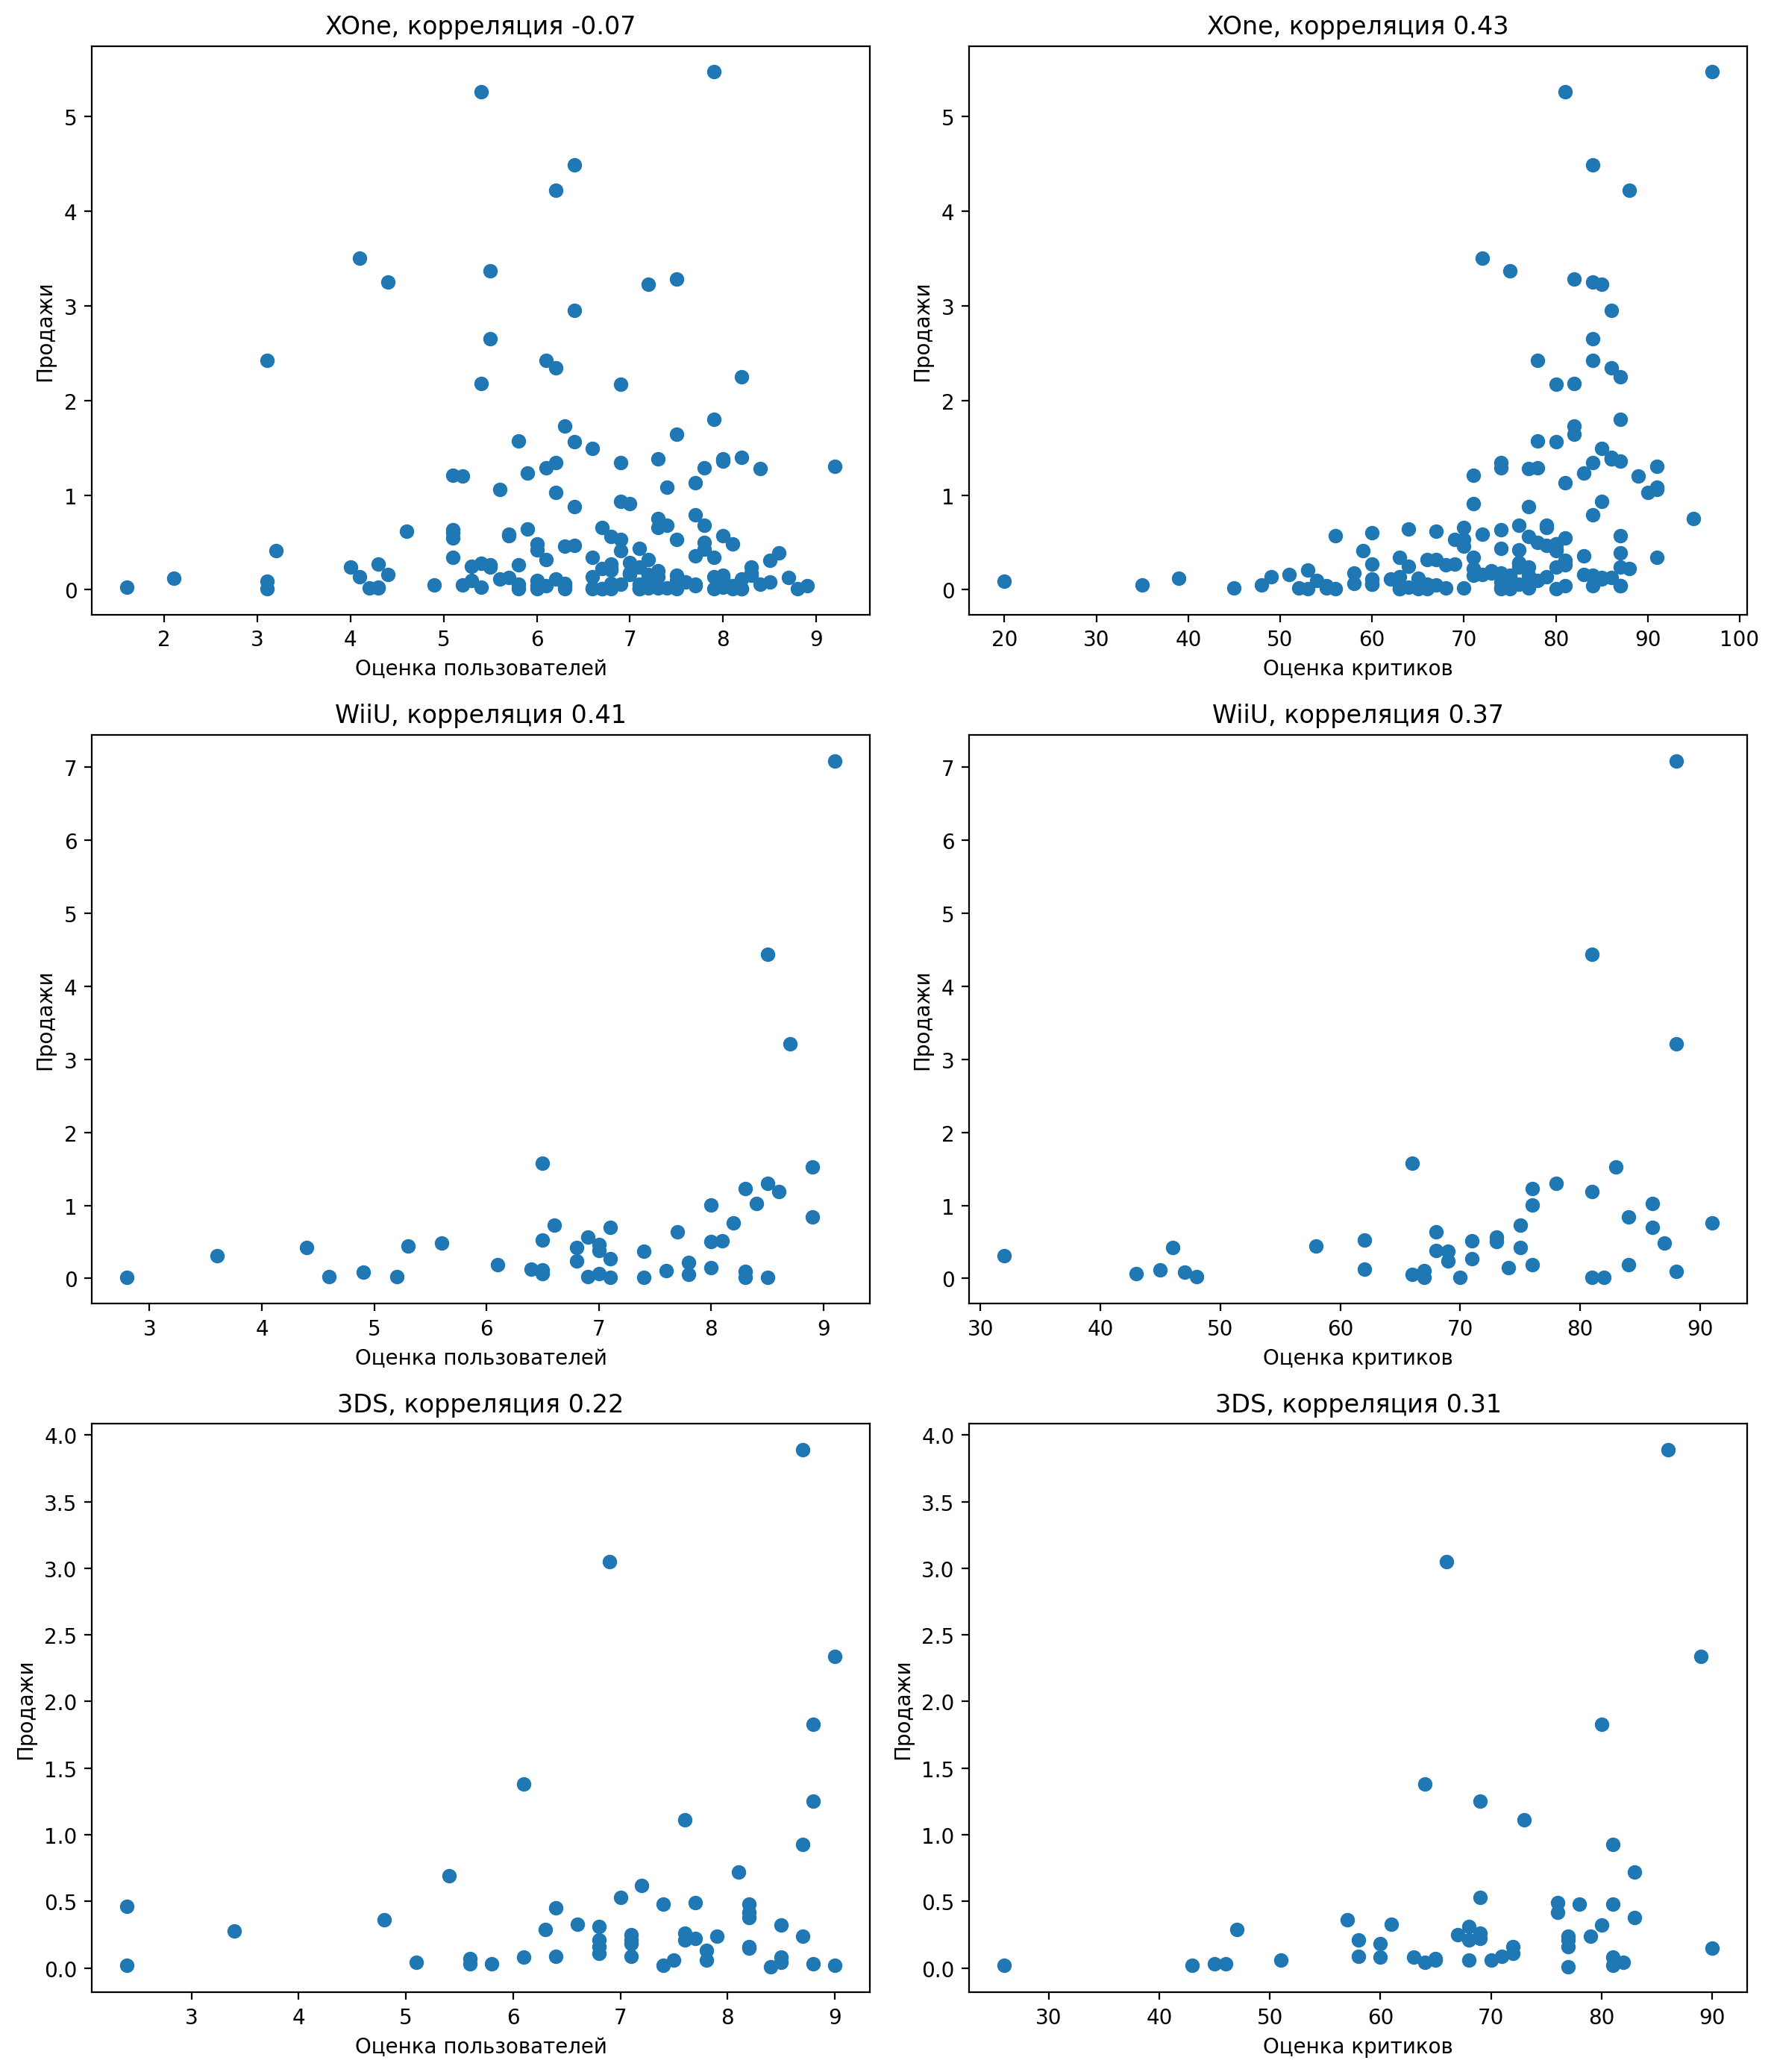

In [38]:
platforms = ['XOne', 'WiiU', '3DS']

fig, axs = plt.subplots(len(platforms), 2, figsize=(12, 14))

for i, item in enumerate(platforms):
    corr = data.query('platform == @item')['user_score'].corr(data.query('platform == @item')['total_sales'])
    axs[i,0].scatter(data.query('platform == @item')['user_score']
                     , data.query('platform == @item')['total_sales']
                    )
    axs[i,0].set_xlabel('Оценка пользователей')
    axs[i,0].set_ylabel('Продажи');
    axs[i,0].set_title(f'{item}, корреляция {corr:.2f}')

    corr = data.query('platform == @item')['critic_score'].corr(data.query('platform == @item')['total_sales'])
    axs[i,1].scatter(data.query('platform == @item')['critic_score']
                     , data.query('platform == @item')['total_sales']
                    )
    axs[i,1].set_xlabel('Оценка критиков')
    axs[i,1].set_ylabel('Продажи');
    axs[i,1].set_title(f'{item}, корреляция {corr:.2f}')

plt.tight_layout()

Примерно такой же результат.  
Игры с critic_score меньше 60 можно считать безнадёжными. С user_score всё по-прежнему размыто: скор может быть очень низкий, а игра всё равно продаётся - "пользователи кололись, но продолжали есть кактус".

### Влияние жанров на продажи.
Посмотрим на распределение игр по жанрам. Каких больше всего делают.

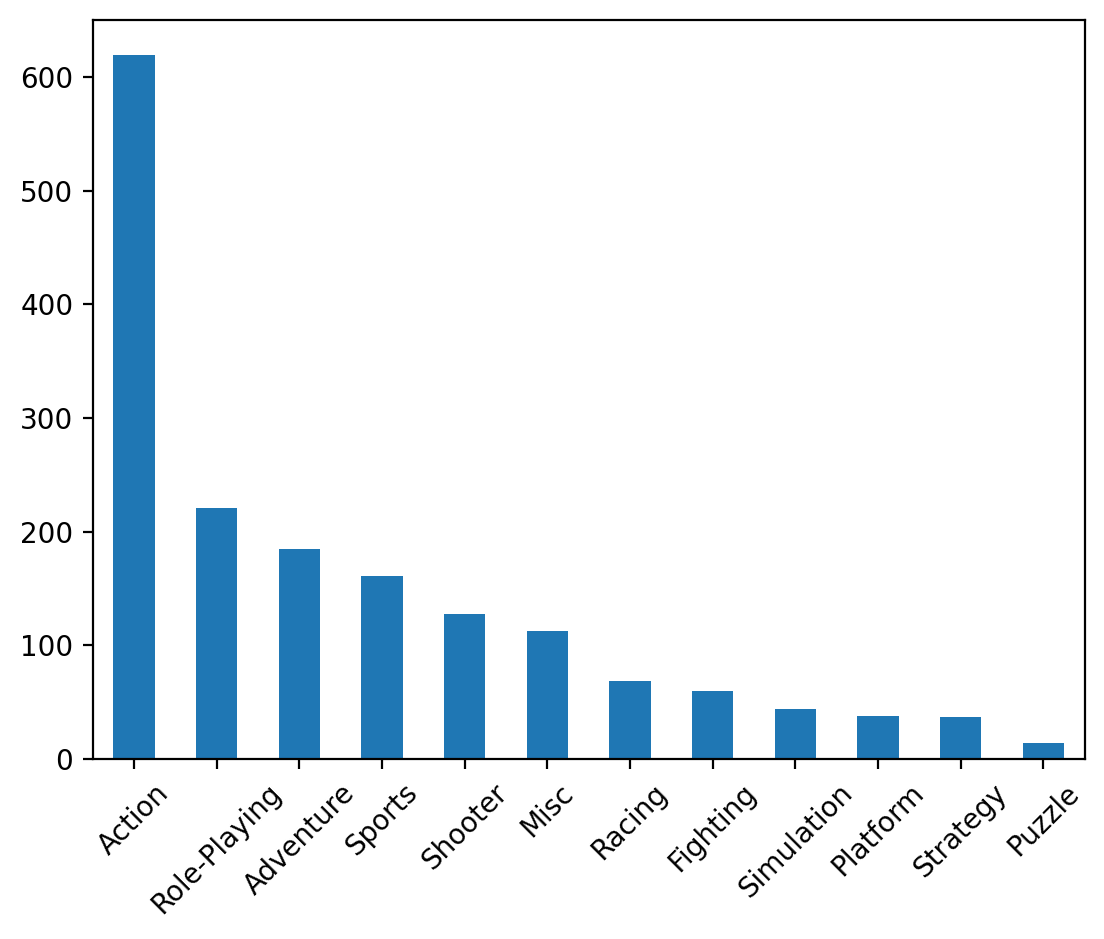

In [39]:
data['genre'].value_counts().plot(kind='bar')
plt.xticks(rotation=45);

Выпускают больше всего action, а интересно, что лучше продаётся.

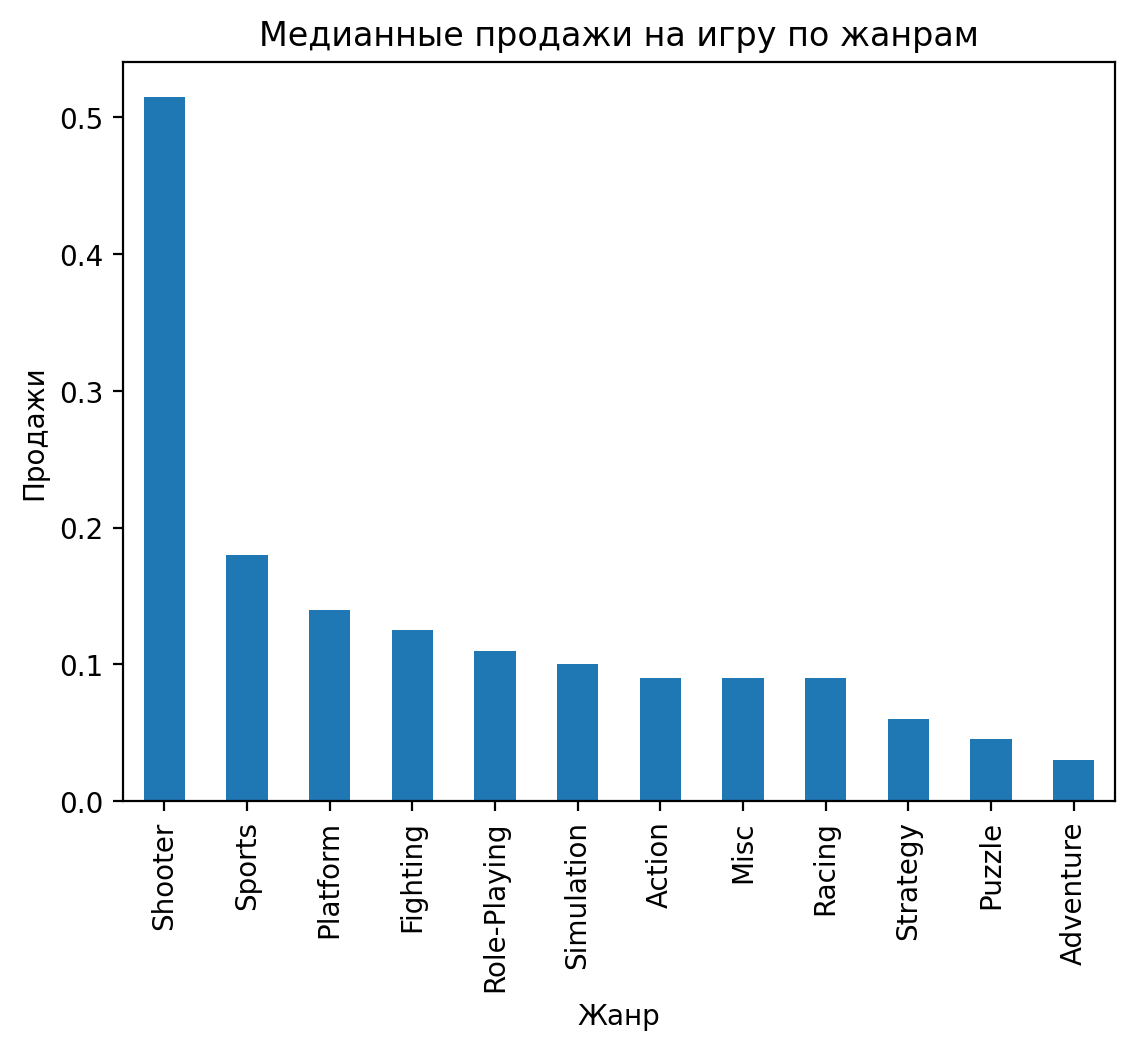

In [40]:
data.groupby('genre')['total_sales'] \
    .median() \
    .sort_values(ascending=False) \
    .plot(kind='bar')
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.title('Медианные продажи на игру по жанрам');

Удивительное, конечно, явление, что продаются шутеры, а выпускают всё равно больше action, ну ладно, производители пусть сами разбираются.  
Лидеры жанров по продажам: shooter, sports, platform.  
Аутсайдеры: adventure, puzzle, strategy.

### Вывод по разделу.
- Оптимальный промежуток для построения прогноза - информация за последние 3 года.
- В среднем платформы живут 7-8 лет, так что делать ставку на платформу, подбирающуюся к этому сроку, не оптимально.   
- Хотя главным образом грядущий закат платформы можно определить не по годам, а по тому, что где-то рядом завелась такая же, но следующего поколения.
- Прямо сейчас фаворитами следует считать PS4, XOne, WiiU (в таком порядке), всё ещё неплохо держатся Wii и X360, плюс можно обратить внимание на 3DS.
- Прямой корреляции влияния отзывов пользователей и критиков на продажи на платформе не наблюдается.
- С уверенностью можно утверждать только, что если отзывы критиков меньше 60, то игра не взлетит, а вот если больше, там есть варианты.
- Жанр, имеющий самый большой финансовый успех - shooter. Дальше идут sports, racing, platform, но тут успех может зависеть от платформы. Puzzle, strategy, adventure - аутсайдеры.

## Портрет пользователя по регионам.
Смотрим покупателей откуда вообще больше на рынке.

In [41]:
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
data[regions].sum()

na_sales      284.06
eu_sales      270.68
jp_sales       93.09
other_sales    81.62
dtype: float64

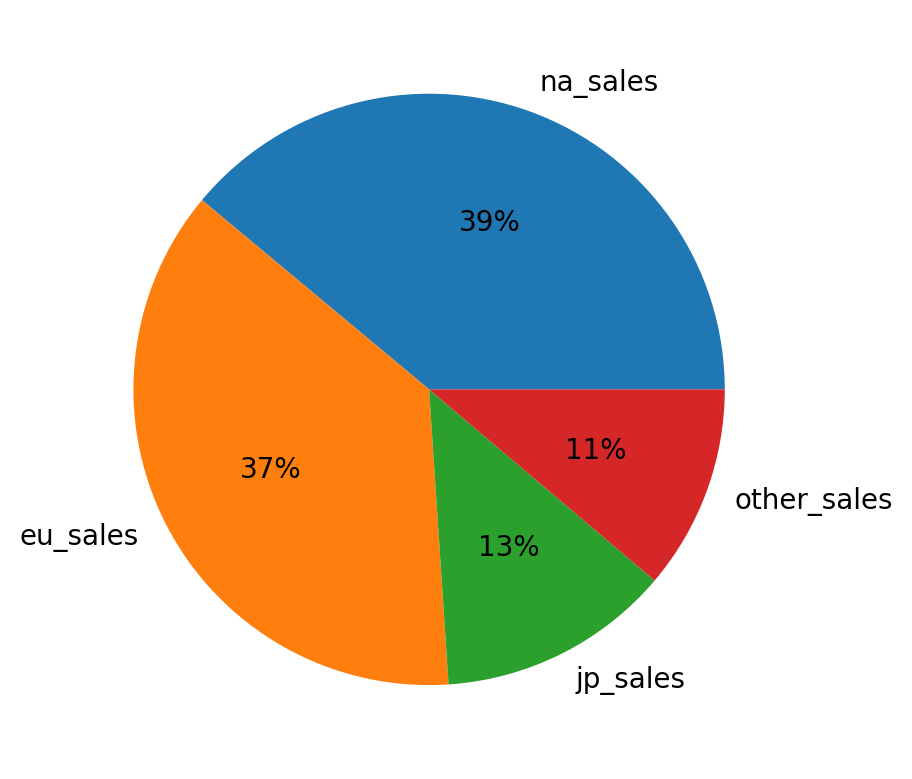

In [42]:
(data[regions].sum() / data['total_sales'].sum()).plot(kind='pie', autopct = '%1.0f%%')
plt.ylabel('');

### Топ-5 платформ по регионам.

Распределение популярности платформ по регионам.

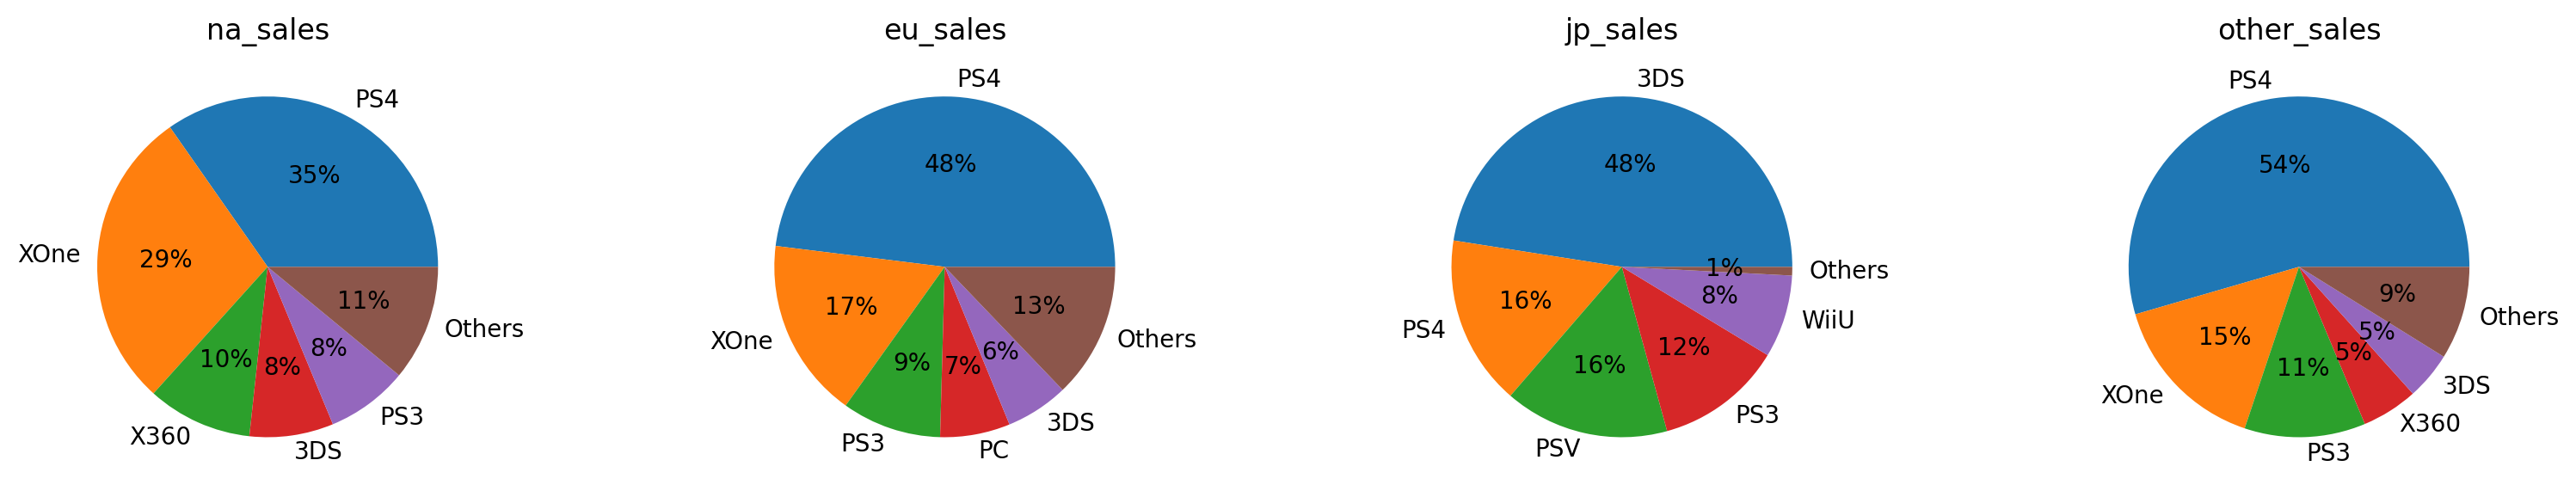

In [44]:
top5 = data.groupby('platform')[regions].sum()
fig, axs = plt.subplots(1, 4, figsize=(16, 3))

for i, item in enumerate(regions):

    #собираем все платформы, что не топ-5 по региону, в категорию 'others'
    top = top5[item].sort_values(ascending=False)[:5]
    others = pd.Series(top5[item].sort_values(ascending=False)[5:].sum(), index=['Others'])
    result = pd.concat([top, others])

    #строим пирог
    ax = result.plot(kind='pie', autopct = '%1.0f%%', ax=axs[i])
    ax.set_ylabel('')
    ax.set_title(item);

plt.tight_layout()

Все люди, как люди, а японцы как с другой планеты.  

Из небольших особенностей у остальных:
- в Европе предпочитают игры на PC, чем X360,
- в Америке чуть в более равную сторону смещено преимущество PS4 перед XOne.

### Топ-5 жанров по регионам.

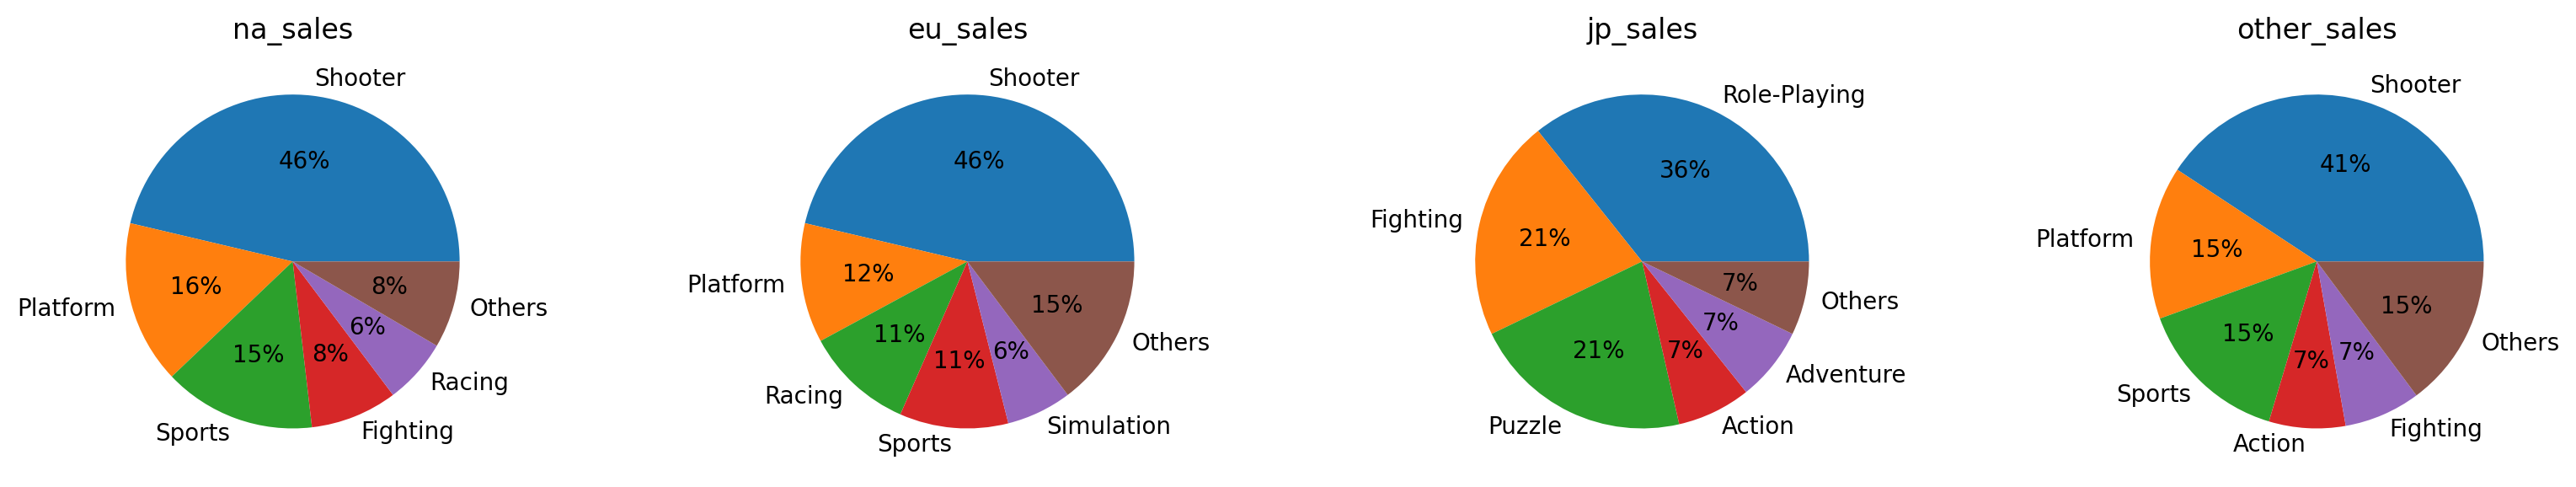

In [46]:
top5 = data.groupby('genre')[regions].median()

fig, axs = plt.subplots(1, 4, figsize=(16, 3))

for i, item in enumerate(regions):
    #собираем все жанры, что не топ-5 по региону, в категорию 'others'
    top = top5[item].sort_values(ascending=False)[:5]
    others = pd.Series(top5[item].sort_values(ascending=False)[5:].sum(), index=['Others'])
    result = pd.concat([top, others])

    ax = result.plot(kind='pie', autopct = '%1.0f%%', ax=axs[i], normalize=True)
    ax.set_ylabel('')
    ax.set_title(item);

plt.tight_layout()

Лучше покупают стрелялки все, кто не японцы. Японцы на своей волне.

### Влияние рейтинга ESRB на продажи в регионах.
Заполним пустые значения случайным словом.

In [47]:
data['rating'].fillna('None', inplace=True)

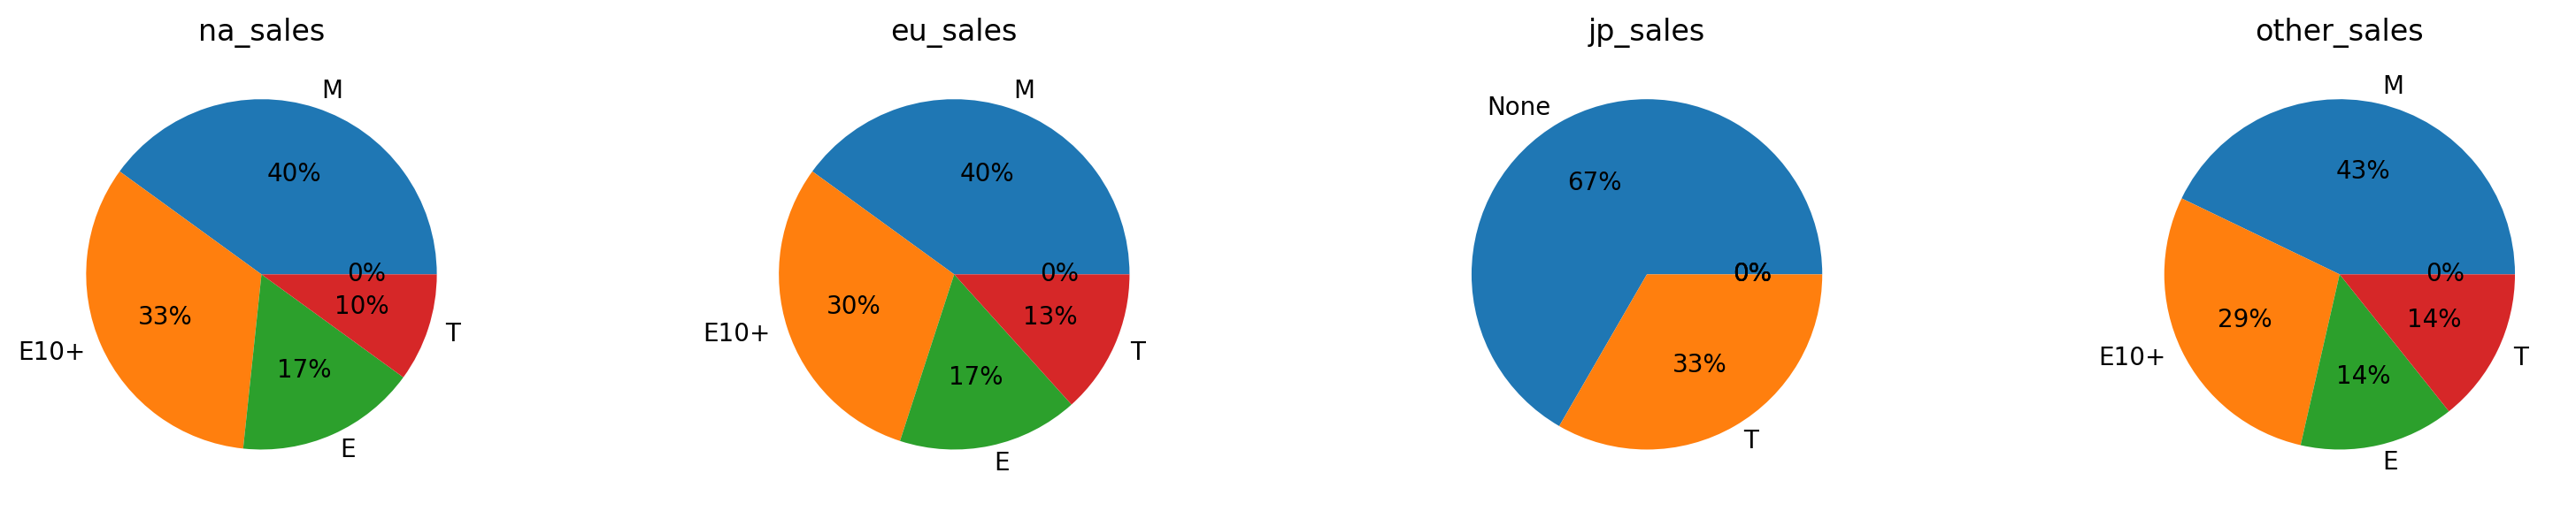

In [48]:
top5 = data.groupby('rating')[regions].median()

fig, axs = plt.subplots(1, 4, figsize=(16, 3))

for i, item in enumerate(regions):
    ax = top5[item].sort_values(ascending=False)[:5].plot(kind='pie', autopct = '%1.0f%%', ax=axs[i], normalize=True)
    ax.set_ylabel('')
    ax.set_title(item);

plt.tight_layout()

Ожидаемо взрослые игры продаются больше всего, чуть менее ожидаемо на втором месте E10+, а меньше всего продаются подростковые.  
Ну кроме, разумеется, японского рынка. Гуглим и обнаруживаем, что у них свои возрастные маркировки CERO - возможно, как-то связано с этим. То, что на японском рынке всё-таки 33% приходится на игры с маркировкой Т - это интересное наблюдение: похоже, что японские подростки, в отличие от остального японского рынка, могут начинать интересоваться продуктами с европейского и американского рынков. За этим надо бы присмотреть в будущем.

### Выводы по разделу.
- Больше всего на рынке покупателей из Северной Америки, далее следует Европа (примерно поровну, по около 40%), меньше всего Японии и других регионов (примерно поровну, по около 10%).
- Платформы: для всего мира, кроме Японии, в качестве фаворитов следует рассматривать PS4 и XOne, в Японии 3DS.
- Жанры: опять же везде, кроме Японии, самые популярные shooting, platform, sports, аутсайдеры - strategy, puzzle. Для Японии самые популярные role-playing и fighting.
- Рейтинги ESRB: лучше всего покупаются взрослые игры (рейтинг М), на втором месте E10+, хуже всего подростковые (кроме, разумеется, Японии).
- Несмотря на то, что у Японии своя возрастная маркировка CERO, 33% японского рынка всё-таки отданы продуктам с маркировкой Т, что может говорить об увеличивающемся интересе, к неяпонским игровым продуктам со стороны подростковой аудитории.

## Общий вывод.

### Предобработка данных потребовалась минимальная
- для удобства поправлены (в lower-case) названия столбцов,
- в столбце `user_score` плейсхолдер 'tbd' заменён на np.nan,
- тип столбца `user_score` заменён с object на float, `year_of_release` с float на int16,
- удалено 269 строк с пропущенными значениями `year_of_release`,
- удалены 2 строки с играми с неизвестным названием и жанром,
- оставлены пустоты в столбцах `critic_score`, `user_score`, `rating`, в итоговом датасете таких осталось `critic_score` - 971, `user_score` - 801, `rating` - 749.
- удалён 1 дубликат,
- создан новые столбец `total_sales` с суммарными продажами.


> Сырые данные содержали **16715** записей об **11599** уникальных играх за **30+ лет**.  
> Для итогового анализа оставлены около **10% данных**: **1689** записей о **956** уникальных играх за **3 года**.  
> Такое драматическое сокращение датасета оправдано тем, что для точности прогноза нас интересует максимально актуальная ситуация, а в этой сфере всё достаточно быстро и существенно меняется.

### Результаты исследовательского анализа
- Определена средняя длительность жизненного цикла игровых платформ: 7-8 лет.
- При этом возможно более удачным критерием скорого угасания платформы будет появление следующего поколения этой платформы на рынке.
- Оптимальный период для анализа с целью построения прогноза - последние 3 года.
- Самые многообещающие платформы на американском-европейском-других рынках: PS4 и XOne, на японском: 3DS.
- Прямой корреляции между отзывами пользователей и продажами не наблюдается.
- Про отзывы критиков можно с уверенностью сказать только, что при отзывах менее 50 (из 100), игра не будет популярной (при отзывах больше 50 тоже никаких гарантий, но хотя бы шансы есть).
- Жанры, имеющие самый большой финансовый успех на американском-европейском-других рынках: shooter, sports, platform (в таком порядке), в японии: role-playing, fighting.
- Жанры-аутсайдеры: strategy, puzzle, adventure.
- Если ориентироваться на рейтинг ESRB, то лучше всего покупаются взрослые игры (рейтинг M), на втором месте Е10+, хуже всего подростковые (кроме, разумеется, Японии).


### Рекомендации для прогнозирования финансовой успешности игры.

Игра должна удовлетворять одному или нескольким следующим условиям:
- Быть выпущеной на платформе со средними продажами на игру выше среднего по рынку на этот период (в 2013-2016 годах это PS4, XOne и ряд других, но там пока или уже меньше).
- Получить отзывы критиков > 60.
- Принадлежать к одному из популярных у покупателей жанров: shooter, sports, platform.
- Иметь возрастной рейтинг M.

### Проверка рекомендаций.

Поскольку у нас нет данных о продажах за каждый отдельный год, то сложно проверить, точно ли выделенные критерии сработают на финансовый успех игры в будущем году. Однако попробуем провести небольшой эксперимент на той дате, что у нас есть.  
Соберём выборку с играми, обладающими интересными нам свойствами, достаточного для проверки гипотезы размера, и проверим, успешнее ли финансово такие игры на нашем периоде, чем все игры в целом на этом же периоде.

In [49]:
#выборка с нужными свойствами
control_sample = data.query('platform in ["PS4", "XOne"] \
           and critic_score > 60 \
           and genre == "Shooter" \
           and rating == "M"')['total_sales']

#выборка со всеми играми на этом же периоде
sample = data['total_sales']

#проверяем, что в выборке >30 значений
control_sample.shape[0]

39

**Нулевая гипотеза:** средние продажи игр с популярных платформ, с высокой оценкой критиков, в жанре стрелялок для взрослых за 2014-2016 годы равны средним продажам вообще всех игр.  
**Альтернативная гипотеза:** средние продажи игр соответствующих выделенным нами критериями выше, чем средние продажи вообще всех игр (на периоде 2014-2016).

In [50]:
st.ttest_ind(control_sample
             , sample
             , equal_var=False
             , alternative='greater').pvalue

1.1492327516292549e-05

pvalue существенно ниже, чем любой применимый для наших целей уровень альфы (ну, возьмём альфу = 0.01, к примеру). Что означает, что гипотезу о равенстве средних генеральных совокупностей мы отвергаем в пользу того, что среднее генеральной совокупности, обладающей определёнными нами свойствами, выше.

Что в итоге означает, что критерии работают.